Foodborne Disease Outbreak Analysis, by Dominique Clemons

GitHub : https://github.com/domoxdash/Foodborne-Disease-Outbreak-Analysis.git

Data : https://www.kaggle.com/datasets/cdc/foodborne-diseases

Foodborne disease outbreaks occur when two or more people become sick after consuming the same contaminated food or drink, resulting in disease through infection or poisoning. According to the CDC, more than 250 infectious agents (pathogens, toxins or chemicals) have been identified in causing food borne disease. The most common symptoms may range from mild to severe depending on the infectious agent causing the disease. Some forms of disease lead to long term health problems or even death. The investigation of outbreaks over time can give information into how disease is spreading in an area, common contaminated foods, as well as which infectious agent is the cause. This information can also help determine the best ways to prevent the disease from occurring in the future. 
    
I am interested in analyzing the food borne disease outbreak data reported by the State of Georgia to see how disease spreads in my area. 
- Have trends in outbreaks gotten better over the years?
- What time of year do outbreaks tend to occur the most? Do the numbers correlate to major holiday celebrations?
- What are the most common infectious agents causing foodborne disease outbreaks?

In [90]:
#data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv ('outbreaks.csv') #create object
df

#The column descriptions include the following.

# Year - when the disease outbreak occurred 
# Month - when the disease outbreak occurred
#State - state reporting the disease outbreak
#Location - where the food was prepped and eaten 
#Food - meal that caused illness. identifies food contmination. 
#Ingredient - specific portion of meal contaminated by pathogen
#Species - pathogen/toxic substance causing foodborne disease 
#Serotype/Genotype - type of pathogen causing illness 
#Status - status whether the pathogen was cofirmed, suspected or none
#Illness - number of cases reported as ill by fooborne disease
#Hospitalization - number of patients hospitalized due to foodborne illness
#Fatalities - number of fatal incidents

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


data cleaning | Filtering by State (Georgia), Status (Confirmed), Columns removed (Food - 47% null, Serotype - 80% null, Ingredient - 90% null)

In [92]:
#data cleaning - drop unwanted features 
remove = ['Food', 'Ingredient', 'Serotype/Genotype']
df.drop(remove, inplace=True, axis=1)

#I only want cases reported in the state of georgia

df.groupby(df['State'])
    
ga = ['Georgia']
df = df.loc[df['State'].isin(ga)]

#I only want cases with a 'confirmed' status

conf = ['Confirmed']
df = df.loc[df['Status'].isin(conf)]
df

,Year,Month,State,Location,Species,Status,Illnesses,Hospitalizations,Fatalities
332,1998,April,Georgia,NaN,Norovirus genogroup II,Confirmed,51,NaN,NaN
457,1998,May,Georgia,NaN,Cyclospora cayatenensis,Confirmed,17,NaN,NaN
827,1998,August,Georgia,Restaurant,Salmonella enterica,Confirmed,33,NaN,NaN
932,1998,September,Georgia,Nursing Home/Assisted Living Facility,Norovirus genogroup II,Confirmed,9,NaN,NaN
936,1998,September,Georgia,Restaurant,Shigella sonnei,Confirmed,34,1.0,0.0
...,...,...,...,...,...,...,...,...,...
18470,2015,April,Georgia,Restaurant,Norovirus genogroup II,Confirmed,8,0.0,0.0
18471,2015,April,Georgia,Restaurant,Norovirus genogroup I,Confirmed,4,0.0,0.0
18723,2015,July,Georgia,Private Home/Residence; Catering Service; Groc...,Salmonella enterica,Confirmed,2,2.0,0.0
18981,2015,November,Georgia,Grocery Store,Salmonella enterica,Confirmed,17,0.0,0.0


In [93]:
#data cleaning - checking missing data
missing = df.isnull().sum() #checking missing values
percent_missing = df.isnull().sum() * 100 / len(df) #percentages of missing values  

print (missing, (percent_missing))

df.dropna(axis=0, thresh = 9, inplace = True)
df.shape

Year                 0
Month                0
State                0
Location            20
Species              0
Status               0
Illnesses            0
Hospitalizations    32
Fatalities          24
dtype: int64 Year                 0.000000
Month                0.000000
State                0.000000
Location            10.050251
Species              0.000000
Status               0.000000
Illnesses            0.000000
Hospitalizations    16.080402
Fatalities          12.060302
dtype: float64


(155, 9)

In [95]:
#data cleaning - address missing data

df['Location'].fillna ('Not Reported', inplace = True) #replace null with not reported
df['Hospitalizations'].fillna('Unknown', inplace = True) #replace null with unknown
df['Fatalities'].fillna ('0.0', inplace = True) #replace null with zeros
df


,Year,Month,State,Location,Species,Status,Illnesses,Hospitalizations,Fatalities
936,1998,September,Georgia,Restaurant,Shigella sonnei,Confirmed,34,1.0,0.0
1513,1999,March,Georgia,Nursing Home/Assisted Living Facility,Norovirus genogroup I,Confirmed,20,0.0,0.0
2004,1999,July,Georgia,Restaurant,Salmonella enterica,Confirmed,16,3.0,0.0
2229,1999,September,Georgia,Restaurant,Salmonella enterica,Confirmed,8,1.0,0.0
2230,1999,September,Georgia,Catering Service,Staphylococcus aureus,Confirmed,100,15.0,0.0
...,...,...,...,...,...,...,...,...,...
18470,2015,April,Georgia,Restaurant,Norovirus genogroup II,Confirmed,8,0.0,0.0
18471,2015,April,Georgia,Restaurant,Norovirus genogroup I,Confirmed,4,0.0,0.0
18723,2015,July,Georgia,Private Home/Residence; Catering Service; Groc...,Salmonella enterica,Confirmed,2,2.0,0.0
18981,2015,November,Georgia,Grocery Store,Salmonella enterica,Confirmed,17,0.0,0.0


In [97]:
#data cleaning - check duplicates

og_shape = df.shape
df.drop_duplicates(subset = ['Year', 'Month', 'State', 'Location', 'Species', 'Illnesses'], keep = 'last', inplace = True)
new_shape = df.shape

print ('OG:', og_shape, 'New:', new_shape)

OG: (155, 9) New: (155, 9)


In [99]:
#data cleaning - check outliers

sorted_df = df.sort_values(by=['Illnesses'], ascending = False)
sorted_df
#df.boxplot (column = ['Illnesses'])

,Year,Month,State,Location,Species,Status,Illnesses,Hospitalizations,Fatalities
4530,2001,May,Georgia,School/College/University,Norovirus genogroup I,Confirmed,329,2.0,0.0
14962,2011,February,Georgia,Office/Indoor Workplace,Norovirus genogroup II,Confirmed,207,1.0,0.0
6834,2003,March,Georgia,Restaurant; School/College/University,Clostridium perfringens,Confirmed,146,0.0,0.0
17300,2013,December,Georgia,Catering Service,Clostridium perfringens,Confirmed,131,0.0,0.0
2780,2000,February,Georgia,Grocery Store,Norovirus genogroup I,Confirmed,128,2.0,0.0
...,...,...,...,...,...,...,...,...,...
16750,2013,April,Georgia,Restaurant,Norovirus genogroup II,Confirmed,2,0.0,0.0
8384,2004,June,Georgia,Restaurant,Salmonella enterica,Confirmed,2,1.0,0.0
4985,2001,September,Georgia,Restaurant,Clostridium perfringens,Confirmed,2,0.0,0.0
18723,2015,July,Georgia,Private Home/Residence; Catering Service; Groc...,Salmonella enterica,Confirmed,2,2.0,0.0


In [100]:
#data cleaning - address outliers?

df = df[df['Illnesses'] < 325]
df.boxplot (column = ['Illnesses'])

<Axes: title={'center': 'Foodborne disease outbreaks occurring per month'}, xlabel='Months (Average)', ylabel='Reports of Illness per month'>

In [102]:
#data cleaning - check data type of each column
print (df.dtypes)
df.shape

Year                  int64
Month                object
State                object
Location             object
Species              object
Status               object
Illnesses             int64
Hospitalizations    float64
Fatalities          float64
dtype: object


(154, 9)

QUESTION 1 : What were the trends in outbreaks between 1998-2015? Have the amount of outbreaks gone down over time

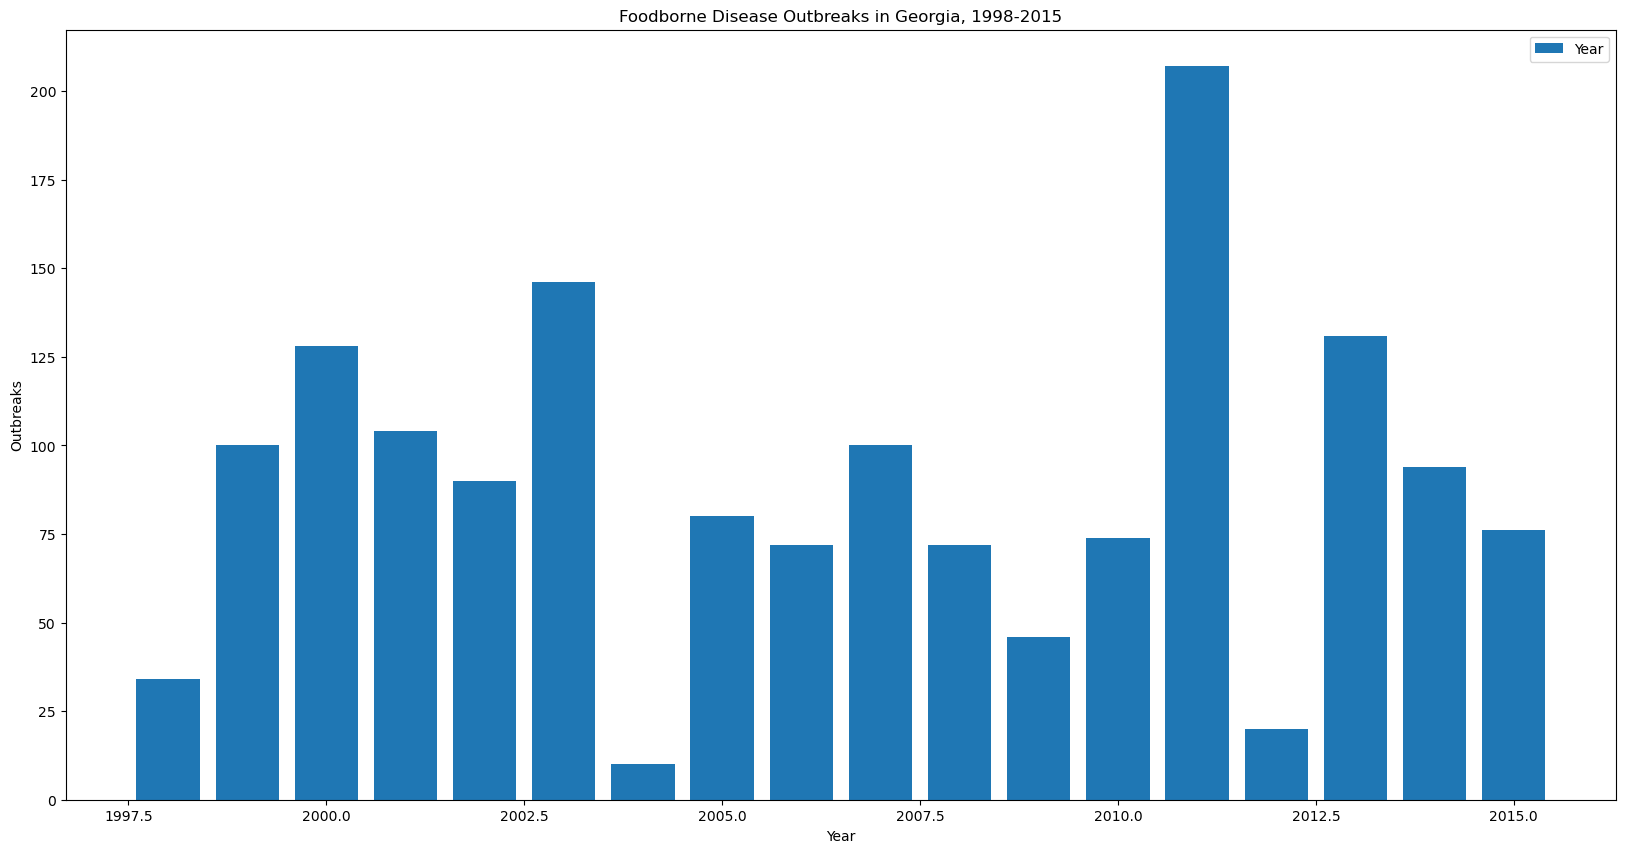

In [114]:
df2 = df[['Year', 'Illnesses']]
plt.figure (figsize=(20,10))
plt.bar(df2['Year'], df2['Illnesses'])


plt.title("Foodborne Disease Outbreaks in Georgia, 1998-2015")
plt.ylabel ('Outbreaks')
plt.xlabel ('Year')
plt.legend(['Year'], loc = 'upper right')
plt.show()

[Question 1] 

Food borne disease outbreak cases have been on the rise since 1998. There was a brief decrease in cases between 2005-2010, followed by a substantial increase in 2011-2015. The year 2011 had the highest case count of around 200 cases, which could have led to the response of the FDA to initiate the Food Safety & Modernization Act of 2011, which enforced new food safety standards on domestic and imported foods. The year 2012 had a substantial decrease in cases, showing that the FDA's policy changes may have had a positive impact on the food industry by raising standards. Cases rose again in the year 2013, but the amount of cases decreased for the following years. 

QUESTION 2 : What time of year do outbreaks tend to occur the most? Do the numbers correlate to holiday celebrations throughout the year?

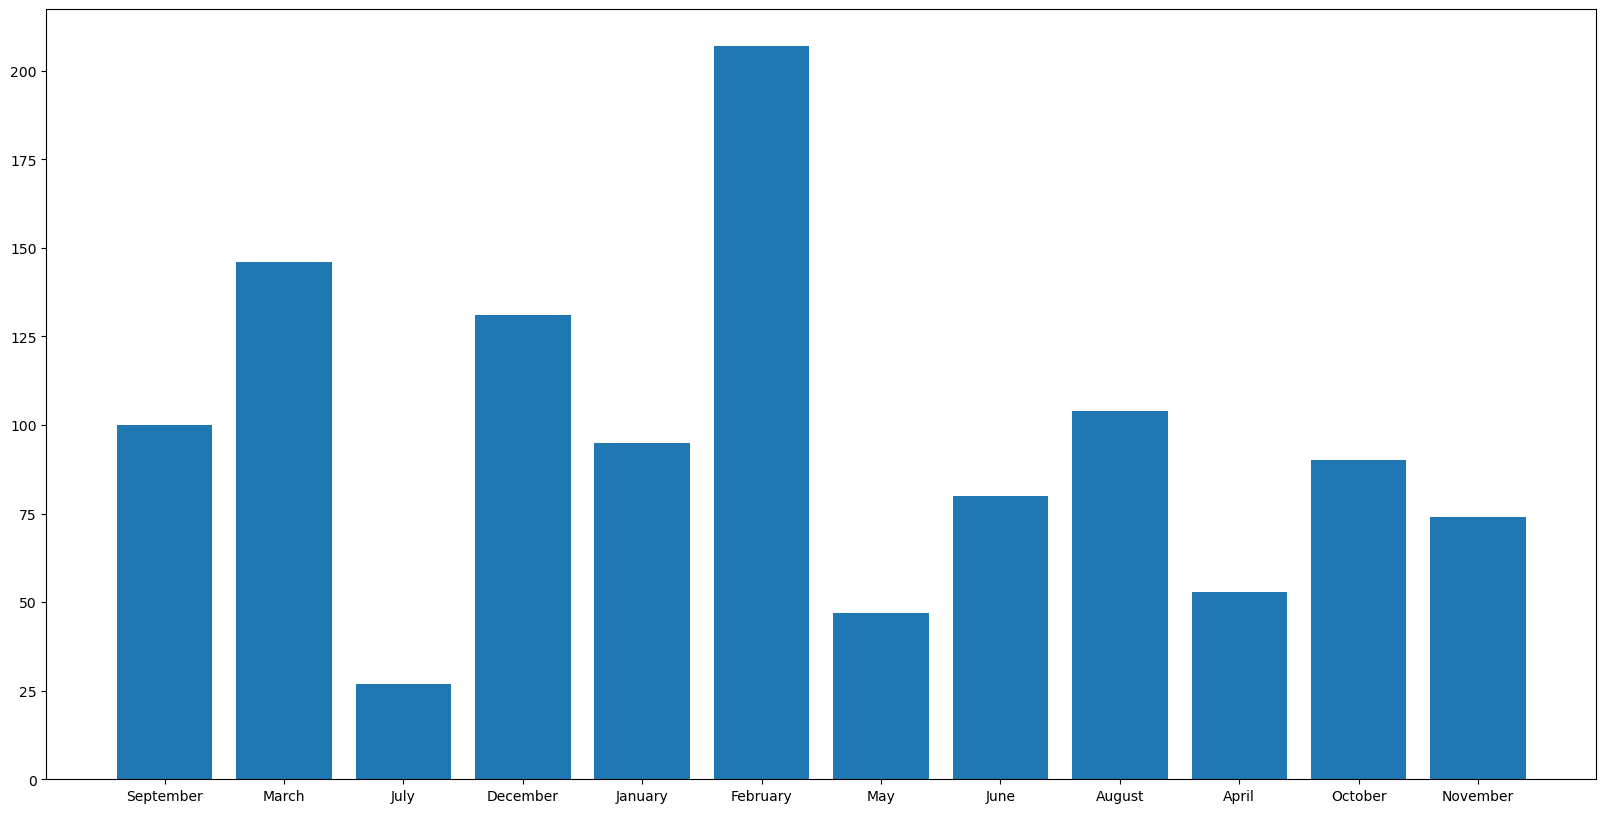

In [116]:
dfm = df[['Month', 'Illnesses']]
dfm.sum()
plt.figure (figsize=(20,10))
plt.bar(dfm['Month'], dfm['Illnesses'])
plt.show()

In [118]:
df3 = df[['Month', 'Illnesses']]

df_3 = df3.pivot_table (values="Illnesses", columns=['Month'],aggfunc={"Illnesses":"mean"},fill_value=0)
print(df_3)
order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_3 = df_3[order]

plt.figure (figsize=(20,10))
df_3.plot(kind='bar', figsize=(20,10))
plt.title ("Foodborne disease outbreaks occurring per month")
plt.ylabel ("Reports of Illness per month")
plt.xlabel ("Months (Average)")
plt.legend()

Month          April  August  December  February    January      July  \
Illnesses  11.538462    39.0    33.625      43.0  27.181818  8.636364   

Month           June      March        May   November  October  September  
Illnesses  22.764706  38.705882  17.466667  29.777778   42.375  30.714286  


[Question 2] 

On average, outbreaks seem to occur the most in months where major holidays are widely celebrated in the United States. February had an average of 43 cases reported, which was the highest among the twelve months and could be due to a greater tendency for people to go to restaurants in celebration of Valentine's as well as large gatherings for Super Bowl. October had the second largest average of 42 cases reported and could be due to Halloween parties and college homecoming celebrations. December cases averaged lower than I expected, at 33 reported cases, which could be higher due to the month closely following behind Thanksgiving as well as Christmas potlucks and dinners.  April, May, June and July consistently remained lower than 25 average cases reported, which was surprising since those are the times where vacationing and outdoor cooking tends to occur and food may be kept outside of improper storage. And, the month of August was the lowest average, with 10 cases reported per month, which could be due to schools going back into session and students may bring lunches that might not be stored at a proper temperature for a long period of time. 



QUESTION 3 : What are the most common infectious agents causing foodborne disease outbreaks?

<Figure size 2000x1000 with 0 Axes>

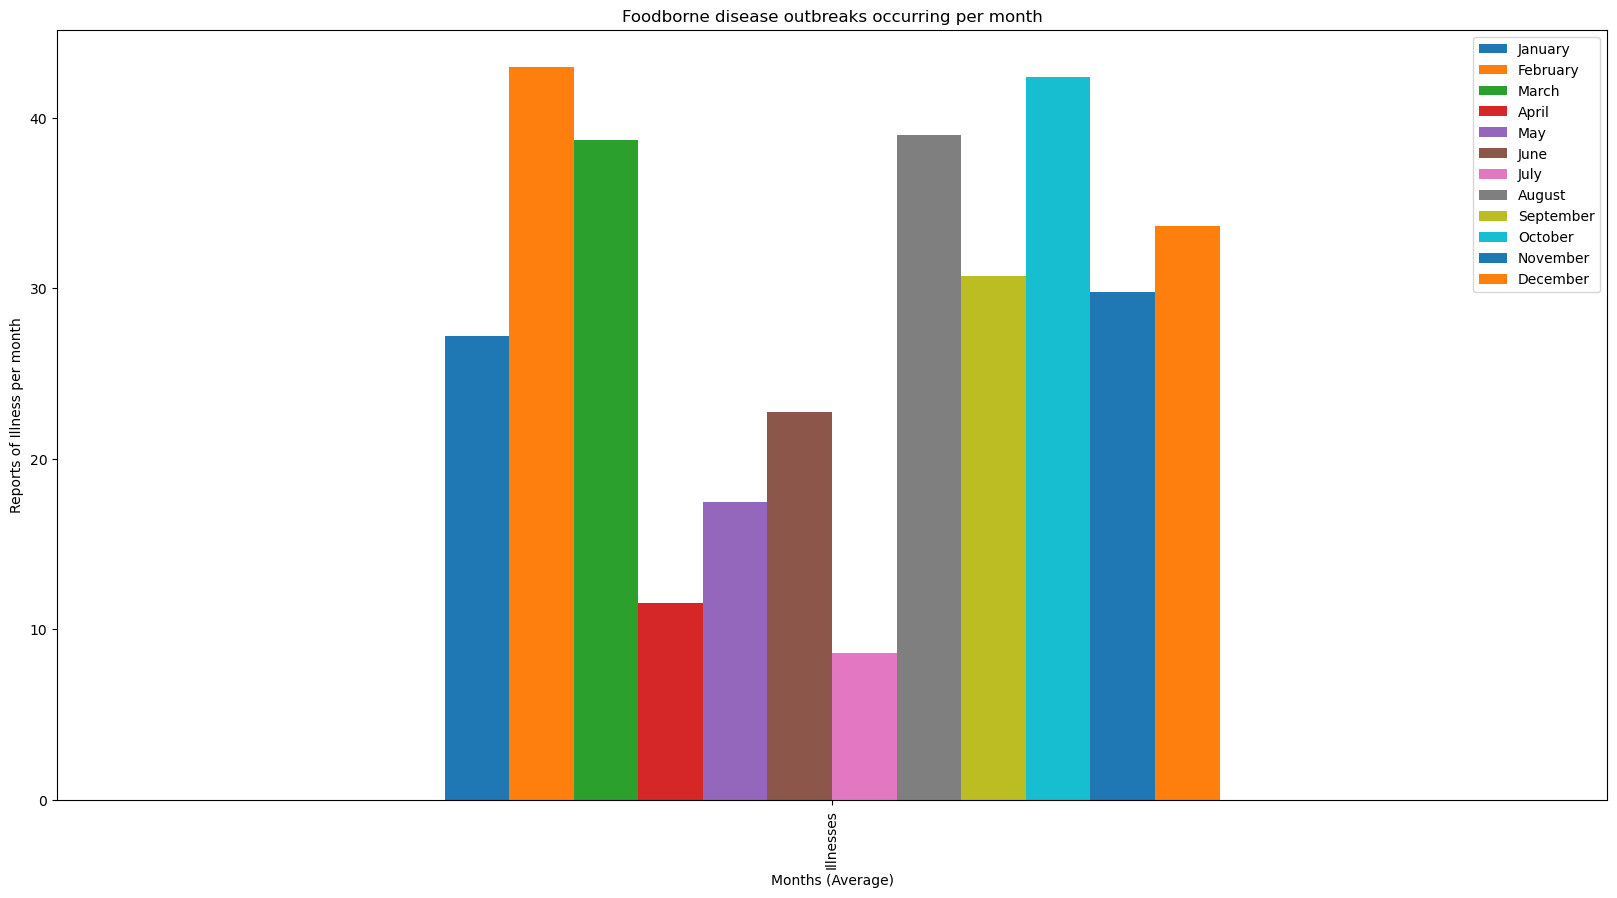

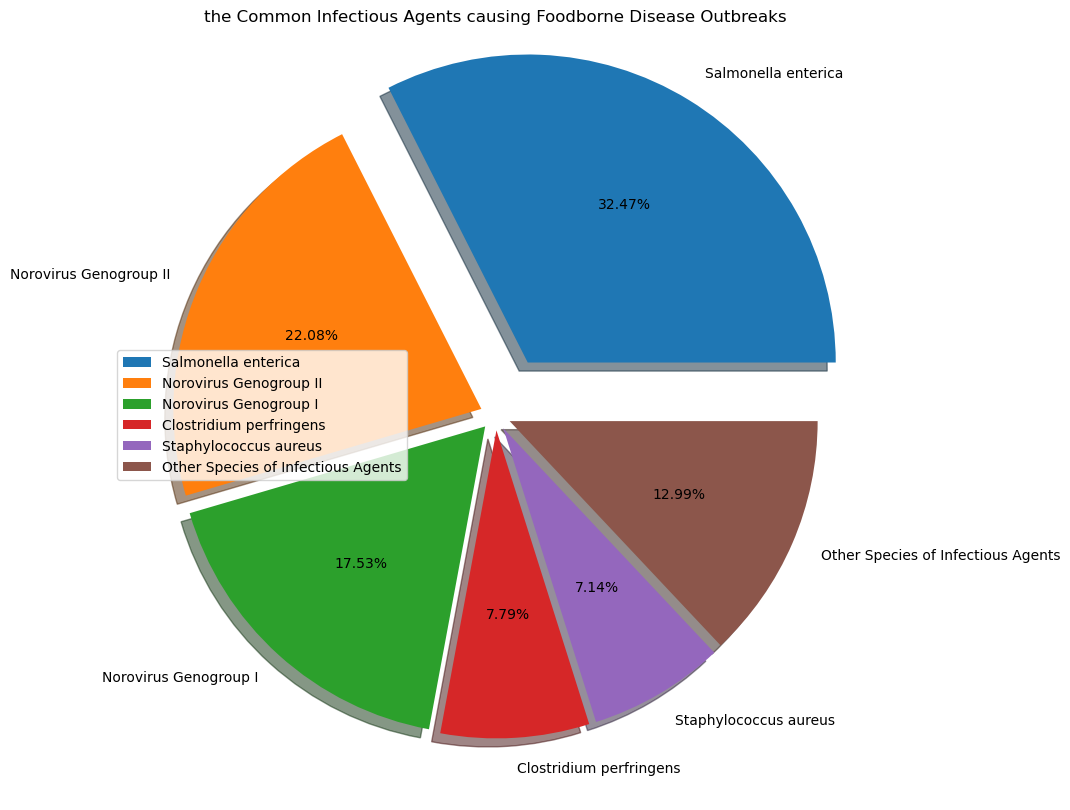

In [21]:
df4 = df[['Species']]
df4= df['Species'].value_counts().reset_index(name='Count')

df_Species = df4.sort_values(by=['Count'], ascending = False)
df_top5 = df_Species[:5].copy()
df_top5

df_other = df_Species[5:].sum()

df_top5.loc[len(df4)] = df_other
df_top5                    


plt.figure (figsize=(20,10))
plt.pie (df_top5["Count"], 
         explode = [0.2, 0.05, 0.05, 0.05, 0.05, 0.05], #must be of x?
         labels = ("Salmonella enterica", "Norovirus Genogroup II", "Norovirus Genogroup I", "Clostridium perfringens", "Staphylococcus aureus", "Other Species of Infectious Agents"),
         shadow = True, 
         autopct = "%.2f%%")
plt.title ("the Common Infectious Agents causing Foodborne Disease Outbreaks") #the most common 
plt.legend()
plt.show()

[Question 3] 

Salmonella enterica was responsible for over 32% of outbreak occurrences between 1998-2015. This could correlate to its high contamination rates in food products like chicken and other packaged meats as well as the handling of animals. Norovirus Genogroup I & II were responsible for 22% ad 17% of outbreaks. Norovirus normally causes disease when someone touches a contaminated surface or shares food utensils used by those who were infected. Norovirus outbreaks are common in restaurants, schools, cruise ships and other places where large gatherings and close living spaces are common. Clostridium perfringens and Staphylococcus aureus were both responsible for about 7% of food contamination. Both of these bacterial species can cause foodborne illness when food is kept outside of safe temperatures whether due to improper storage or by improper preparation.

Summary 

Foodborne disease outbreaks have lowered in recent years in correlation with policy improvements in safety guidelines by the FDA. On average, outbreaks seem to occur the most in months where major holidays are widely celebrated in the United States. The top five foodborne disease causing organisms are Salmonella enterica, Norovirus Genogroup I & II, Clostriduum perfringens and Staphylococcus aureus. 
I did not find information related to the location of outbreaks, the type of food contaminated and the specific ingredient that was contaminated due to the high amount of reports not including this information. My data analysis does not account for outbreaks that were reported in multiple states as (Multistate). These outbreaks could have included the state of Georgia, but this detail was not available because those reports did not specify what specific states were included in the "Multistate" records. My data analysis also excludes all cases that were not confirmed by laboratory diagnosis (suspected and null). The amount of outbreaks by year and average outbreaks by month could potentially be higher by including all of this information. Further exploration is needed to see how the historical data correlates with recent outbreak reports. The future analyis of data between 2015-2025 would allow us to see if new policy and guideline changes helped to lower the amount of foodborne disease outbreaks compared to 1998-2015. 

Reference : https://www.cdc.gov/fdoss/faq.html

Reference : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4284301/

Reference : https://www.fda.gov/about-fda/fda-history/milestones-us-food-and-drug-law